# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [197]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [198]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [199]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [200]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [201]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [202]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [203]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [204]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [205]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [206]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [207]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [208]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [209]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [210]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [211]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [212]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [213]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:57<00:00, 1889.93it/s]


In [214]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [215]:
# similarly you can preprocess the titles also
print(project_data['project_title'].values[0])
print('-'*100)
print(project_data['project_title'].values[289])
print('-'*100)
print(project_data['project_title'].values[1090])
print('-'*100)
print(project_data['project_title'].values[7])
print('-'*100)
print(project_data['project_title'].values[15000])
print('-'*100)
print(project_data['project_title'].values[15468])

Engineering STEAM into the Primary Classroom
----------------------------------------------------------------------------------------------------
Give Stall HS Choral Program a Fighting Chance
----------------------------------------------------------------------------------------------------
Do you \"get\" it?
----------------------------------------------------------------------------------------------------
21st Century Learning with Multimedia
----------------------------------------------------------------------------------------------------
Building Independence One Piece at a Time.
----------------------------------------------------------------------------------------------------
Flexible Seating: \"I Learn Best!\"


In [216]:
# let's decontract the titles by using the decontracted fuinction defined above
decon = decontracted(project_data['project_title'].values[7])
print(decon)

21st Century Learning with Multimedia


In [217]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sen = project_data['project_title'].values[15000].replace('\\r',' ')
sen = sen.replace('\\"',' ')
sen = sen.replace('\\n',' ')
print(sen)

Building Independence One Piece at a Time.


In [218]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', project_data['project_title'].values[15468])
print(sent)

Flexible Seating I Learn Best 


In [219]:
#let's combine all above and apply to all the data points
preprocessed_title = []
for sentances in tqdm(project_data['project_title'].values):
    sentance = decontracted(sentances)
    sentance = sentance.replace("\\r",' ')
    sentance = sentance.replace("\\n",' ')
    sentance = sentance.replace('\\"',' ')
    sentance = re.sub('[^A-Za-z0-9]+',' ',sentance)
    
    sentance = ' '.join(e for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_title.append(sentance.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 40799.04it/s]


In [220]:
preprocessed_title[20000]

'health nutritional cooking kindergarten'

## 1.5 Preparing data for models

In [221]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [222]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [223]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [224]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
#encoding state values with count vectorizer
vectorizer = CountVectorizer(lowercase = False,binary = True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encoding ",school_state_one_hot.shape)
print(school_state_one_hot.toarray())

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encoding  (109248, 51)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [225]:
a = school_state_one_hot.toarray()
b = a.ravel()
len(b)


5571648

In [226]:
#encoding state values with count vectorizer
#cite :  https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
# above link I refered for handling nan values in the teacher_prefix column

vectorizer = CountVectorizer(lowercase = False,binary = True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encoding ",teacher_prefix_one_hot.shape)
print(teacher_prefix_one_hot.toarray())

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan']
Shape of matrix after one hot encoding  (109248, 6)
[[0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 ...
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]]


In [227]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbl = LabelEncoder()
a = lbl.fit_transform(project_data['project_grade_category'])
print(lbl.classes_)
onehotencoder = OneHotEncoder()
project_grade_category_one_hot = onehotencoder.fit_transform(a.reshape(-1,1))
project_grade_category_one_hot.toarray()

['Grades 3-5' 'Grades 6-8' 'Grades 9-12' 'Grades PreK-2']


array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [228]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16512)


In [229]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (109248, 3222)


#### 1.5.2.2 TFIDF vectorizer

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16512)


<h4><font color='red'> TFIDF Vectorizer on `project_title`</font></h4>

In [231]:
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 3222)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [232]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [233]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [234]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 109248/109248 [00:31<00:00, 3453.50it/s]


109248
300


<h4><font color='red'> Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [235]:
# Similarly you can vectorize for title also
# compute average word2vec for each review.
avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))

100%|██████████| 109248/109248 [00:01<00:00, 58018.34it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [236]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [237]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 109248/109248 [03:46<00:00, 482.31it/s]


109248
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [238]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [239]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title.append(vector)

print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))

100%|██████████| 109248/109248 [03:43<00:00, 489.74it/s]


109248
300


### 1.5.3 Vectorizing Numerical features

In [240]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [241]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [242]:
price_standardized

array([[ 1.16172762],
       [-0.23153793],
       [ 0.08402983],
       ...,
       [ 0.27450792],
       [-0.0282706 ],
       [-0.79625102]])

In [243]:
teacher_scalar = StandardScaler()
teacher_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(f"Mean : {teacher_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_scalar.var_[0])}")

teacher_normalized = teacher_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard deviation : 27.77702641477403


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [244]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16512)
(109248, 1)


In [245]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16552)

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

   - school_state : categorical data
   - clean_categories : categorical data
   - clean_subcategories : categorical data
   - project_grade_category : categorical data
   - teacher_prefix : categorical data

   - project_title : text data
   - text : text data

   - teacher_number_of_previously_posted_projects : numerical
   - price : numerical

In [246]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved','Unnamed: 0','id','teacher_id','Date','project_essay_1','project_essay_2','project_essay_3','project_essay_4','project_resource_summary','quantity'], axis=1)
X.head(1)

,teacher_prefix,school_state,project_grade_category,project_title,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,Mrs.,CA,Grades PreK-2,Engineering STEAM into the Primary Classroom,53,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,725.05


<h1>2. K Nearest Neighbor</h1>

<h3>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h3>

In [247]:
#Considering 50K Data Points

X = X.head(50000)
y = y[:50000]

In [248]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [249]:
X_train['teacher_prefix'].isna().any()

True

if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [250]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3>2.2.1 encoding categorical features: School State</h3>

In [251]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>2.2.2 encoding categorical features: teacher_prefix</h3>

In [252]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype('U'))

X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 6) (22445,)
(11055, 6) (11055,)
(16500, 6) (16500,)
['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']


<h3>2.2.3 encoding categorical features: clean_categories</h3>

In [253]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

X_train_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cat_ohe.shape, y_train.shape)
print(X_cv_cat_ohe.shape, y_cv.shape)
print(X_test_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3>2.2.4 encoding categorical features: clean_subcategories</h3>

In [254]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcat_ohe.shape, y_train.shape)
print(X_cv_subcat_ohe.shape, y_cv.shape)
print(X_test_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [255]:
print(X_cv_cat_ohe.toarray())

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<h3>2.2.5 encoding categorical features: project_grade_category</h3>

In [256]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbl = LabelEncoder()
lbl.fit(X_train['project_grade_category'].values)

X_train_grade_lbl = lbl.transform(X_train['project_grade_category'].values)
X_cv_grade_lbl = lbl.transform(X_cv['project_grade_category'].values)
X_test_grade_lbl = lbl.transform(X_test['project_grade_category'].values)

ohe = OneHotEncoder()
ohe.fit(X_train_grade_lbl.reshape(-1,1))
X_train_grade_ohe = ohe.transform(X_train_grade_lbl.reshape(-1,1))
X_cv_grade_ohe = ohe.transform(X_cv_grade_lbl.reshape(-1,1))
X_test_grade_ohe = ohe.transform(X_test_grade_lbl.reshape(-1,1))

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)

print("="*100)

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)


In [257]:
print(X_cv_grade_ohe.toarray())

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


<h3>2.2.6 Scaling Numerical features: Price</h3>

In [258]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train['price'].values.reshape(-1,1))
X_train_price_std = std.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_std = std.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_std = std.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_std, y_train.shape)
print(X_cv_price_std, y_cv.shape)
print(X_test_price_std, y_test.shape)

print("="*100)

After vectorizations
[[-0.61494953]
 [ 0.39019633]
 [-0.49846349]
 ...
 [-0.01541489]
 [ 0.31245647]
 [-0.74658756]] (22445,)
[[-0.4658496 ]
 [-0.49901347]
 [ 0.74229437]
 ...
 [-0.60251995]
 [ 0.00380695]
 [ 0.88762694]] (11055,)
[[-0.82748981]
 [ 0.16019414]
 [-0.02723949]
 ...
 [-0.17584444]
 [ 1.60994491]
 [-0.09507969]] (16500,)


<h3>2.2.7 Scaling Numerical features: teacher_number_of_previously_posted_projects </h3>

In [259]:
std = StandardScaler()
std.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teach_prev_std = std.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teach_prev_std = std.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teach_prev_std = std.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teach_prev_std, y_train.shape)
print(X_cv_teach_prev_std, y_cv.shape)
print(X_test_teach_prev_std, y_test.shape)

print("="*100)

After vectorizations
[[-0.39987478]
 [-0.09677302]
 [-0.39987478]
 ...
 [-0.05347277]
 [-0.01017252]
 [-0.39987478]] (22445,)
[[-0.18337352]
 [-0.09677302]
 [-0.14007327]
 ...
 [-0.39987478]
 [-0.39987478]
 [ 0.29292924]] (11055,)
[[-0.26997403]
 [-0.35657453]
 [-0.35657453]
 ...
 [-0.22667378]
 [-0.22667378]
 [ 2.71774329]] (16500,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [260]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3>2.3.1 Vectorizing Essay </h3>

<h4>2.3.1.1 Vectorizing Essay : BOW </h4>

In [261]:
vectorizer = CountVectorizer(min_df=10)
X_train_essay_bow = vectorizer.fit_transform(X_train['essay'])
X_cv_essay_bow = vectorizer.transform(X_cv['essay'])
X_test_essay_bow = vectorizer.transform(X_test['essay'])

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

print("="*100)

After vectorizations
(22445, 9113) (22445,)
(11055, 9113) (11055,)
(16500, 9113) (16500,)


<h4>2.3.1.2 Vectorizing Essay : TFidf </h4>

In [262]:
vectorizer = TfidfVectorizer(min_df=10)
X_train_essay_tfidf = vectorizer.fit_transform(X_train['essay'])
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'])
X_test_essay_tfidf = vectorizer.transform(X_test['essay'])

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

print("="*100)

After vectorizations
(22445, 9113) (22445,)
(11055, 9113) (11055,)
(16500, 9113) (16500,)


In [263]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h4>2.3.1.3 Vectorizing Essay : AvgW2v </h4>

In [264]:
# average Word2Vec
# compute average word2vec for each review.


def avg_w2v(preprocessed_essays):
    avg_w2v_vectors = []
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

X_train_essay_avg_w2v = avg_w2v(X_train['essay'])
X_cv_essay_avg_w2v = avg_w2v(X_cv['essay'])
X_test_essay_avg_w2v = avg_w2v(X_test['essay'])

print("After vectorizations")
print(len(X_train_essay_avg_w2v), y_train.shape)
print(len(X_cv_essay_avg_w2v), y_cv.shape)
print(len(X_test_essay_avg_w2v), y_test.shape)

print("="*100)



100%|██████████| 16500/16500 [00:06<00:00, 2673.85it/s]


After vectorizations
22445 (22445,)
11055 (11055,)
16500 (16500,)


In [265]:
len(X_train['essay'])

22445

<h4>2.3.1.4 Vectorizing Essay : TFidf W2V</h4>

In [266]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### Creating dictionary only for training pts.

In [267]:
 # the avg-w2v for each sentence/review is stored in this list
def tfidf_w2v(preprocessed_essays):
    tfidf_w2v_vectors = []
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    
    return tfidf_w2v_vectors

X_train_essay_tfidf_w2v = tfidf_w2v(X_train['essay'])
X_cv_essay_tfidf_w2v = tfidf_w2v(X_cv['essay'])
X_test_essay_tfidf_w2v = tfidf_w2v(X_test['essay'])

print("After vectorizations")
print(len(X_train_essay_tfidf_w2v), y_train.shape)
print(len(X_cv_essay_tfidf_w2v), y_cv.shape)
print(len(X_test_essay_tfidf_w2v), y_test.shape)

print("="*100)


100%|██████████| 16500/16500 [01:12<00:00, 226.62it/s]


After vectorizations
22445 (22445,)
11055 (11055,)
16500 (16500,)


In [268]:
len(X_train['essay'])

22445

<h3>2.3.2 Vectorizing Title </h3>

<h4>2.3.2.1 Vectorizing Title : BOW </h4>

In [269]:
vectorizer = CountVectorizer(min_df=10)
X_train_title_bow = vectorizer.fit_transform(X_train['project_title'])
X_cv_title_bow = vectorizer.transform(X_cv['project_title'])
X_test_title_bow = vectorizer.transform(X_test['project_title'])

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)

print("="*100)

After vectorizations
(22445, 1212) (22445,)
(11055, 1212) (11055,)
(16500, 1212) (16500,)


<h4>2.3.2.2 Vectorizing Title : TfIdf </h4>

In [270]:
vectorizer = TfidfVectorizer(min_df=10)
X_train_title_tfidf = vectorizer.fit_transform(X_train['project_title'])
X_cv_title_tfidf = vectorizer.transform(X_cv['project_title'])
X_test_title_tfidf = vectorizer.transform(X_test['project_title'])

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)

print("="*100)

After vectorizations
(22445, 1212) (22445,)
(11055, 1212) (11055,)
(16500, 1212) (16500,)


<h4>2.3.2.3 Vectorizing Title : Avg W2V </h4>

In [271]:
def avg_w2v(preprocessed_essays):
    avg_w2v_vectors = []
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

X_train_title_avg_w2v = avg_w2v(X_train['project_title'])
X_cv_title_avg_w2v = avg_w2v(X_cv['project_title'])
X_test_title_avg_w2v = avg_w2v(X_test['project_title'])

print("After vectorizations")
print(len(X_train_title_avg_w2v), y_train.shape)
print(len(X_cv_title_avg_w2v), y_cv.shape)
print(len(X_test_title_avg_w2v), y_test.shape)

print("="*100)

100%|██████████| 16500/16500 [00:00<00:00, 55705.15it/s]


After vectorizations
22445 (22445,)
11055 (11055,)
16500 (16500,)


<h4>2.3.2.4 Vectorizing Title : TfIdf W2V </h4>

In [272]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### Creating dictionary only for training pts.

In [273]:
 # the avg-w2v for each sentence/review is stored in this list
def tfidf_w2v(preprocessed_essays):
    tfidf_w2v_vectors = []
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    
    return tfidf_w2v_vectors

X_train_title_tfidf_w2v = tfidf_w2v(X_train['project_title'])
X_cv_title_tfidf_w2v = tfidf_w2v(X_cv['project_title'])
X_test_title_tfidf_w2v = tfidf_w2v(X_test['project_title'])

print("After vectorizations")
print(len(X_train_title_tfidf_w2v), y_train.shape)
print(len(X_cv_title_tfidf_w2v), y_cv.shape)
print(len(X_test_title_tfidf_w2v), y_test.shape)

print("="*100)

100%|██████████| 16500/16500 [00:00<00:00, 68094.78it/s]


After vectorizations
22445 (22445,)
11055 (11055,)
16500 (16500,)


<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [274]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>


#### 2.4.1.1 Concatnating matrices

In [275]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_cat_ohe, X_train_subcat_ohe, X_train_essay_bow, X_train_title_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std, X_train_teach_prev_std)).tocsr()
X_te = hstack((X_test_cat_ohe, X_test_subcat_ohe, X_test_essay_bow, X_test_title_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std, X_test_teach_prev_std)).tocsr()
X_cr = hstack((X_cv_cat_ohe, X_cv_subcat_ohe, X_cv_essay_bow, X_cv_title_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std, X_cv_teach_prev_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 10427) (22445,)
(11055, 10427) (11055,)
(16500, 10427) (16500,)


#### 2.4.1.2 Searching for best K

In [276]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [277]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 5/5 [07:15<00:00, 88.23s/it] 


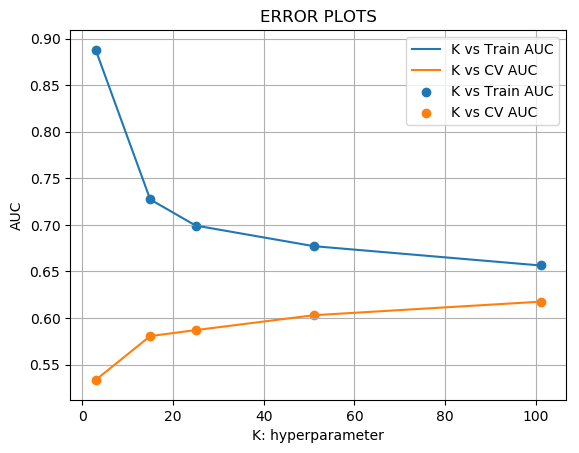

In [278]:
#cite : https://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet - how to reset matplotlib arguments to default

K = [3, 15, 25, 51, 101]

train_auc = []
cv_auc = []

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr,y_train)
    
    y_train_pred = batch_predict(neigh,X_tr)
    y_cv_pred = batch_predict(neigh,X_cr)

## Calculate AUC 
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs 
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

## we will plot the auc scores corresponding to different K's to get our best K
plt.style.use('default')
plt.plot(K,train_auc,label = "K vs Train AUC")
plt.plot(K,cv_auc,label = "K vs CV AUC")

plt.scatter(K,train_auc,label = "K vs Train AUC")
plt.scatter(K,cv_auc,label = "K vs CV AUC")

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 2.4.1.3 Applying KNN

In [279]:
#from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less
best_k = 101

In [280]:
## Plotting ROC Curve for both train and test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc


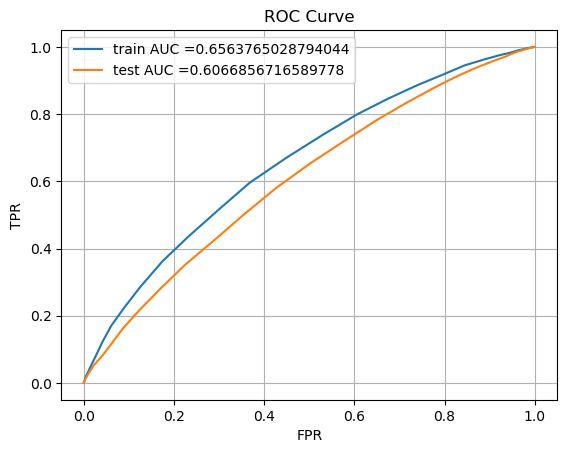

In [281]:
neigh = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1)
neigh.fit(X_tr,y_train)

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr_bow, train_tpr_bow, tr_the_bow = roc_curve(y_train, y_train_pred)
test_fpr_bow, test_tpr_bow,te_the_bow = roc_curve(y_test,y_test_pred)

plt.style.use('default')

plt.plot(train_fpr_bow, train_tpr_bow, label="train AUC ="+str(auc(train_fpr_bow, train_tpr_bow)))
plt.plot(test_fpr_bow, test_tpr_bow, label="test AUC ="+str(auc(test_fpr_bow, test_tpr_bow)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [282]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [283]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_the_bow, train_fpr_bow, train_tpr_bow)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3766452522107407 for threshold 0.812
Train confusion matrix
[[ 2272  1323]
 [ 7616 11234]]
Test confusion matrix
[[1513 1129]
 [5807 8051]]


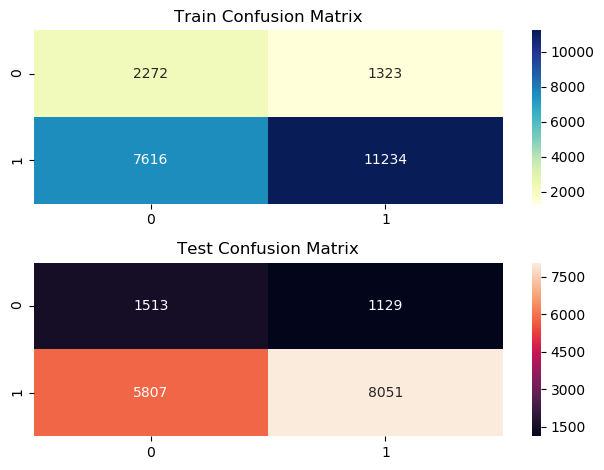

In [284]:
#cite:
# http://seaborn.pydata.org/generated/seaborn.heatmap.html -- Heat maps
# https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib -- tight layout for spacing


fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set_title('Train Confusion Matrix')
ax2.set_title('Test Confusion Matrix')
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True ,fmt = 'd', ax = ax1,cmap="YlGnBu")
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True ,fmt = 'd', ax= ax2)# #annot=True to annotate cells
fig.tight_layout()


### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>


#### 2.4.2.1 Concatnating matrices

In [285]:
X_tr_tfidf = hstack((X_train_cat_ohe, X_train_subcat_ohe, X_train_essay_tfidf, X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std, X_train_teach_prev_std)).tocsr()
X_te_tfidf = hstack((X_test_cat_ohe, X_test_subcat_ohe, X_test_essay_tfidf, X_test_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std, X_test_teach_prev_std)).tocsr()
X_cr_tfidf = hstack((X_cv_cat_ohe, X_cv_subcat_ohe, X_cv_essay_tfidf, X_cv_title_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std, X_cv_teach_prev_std)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 10427) (22445,)
(11055, 10427) (11055,)
(16500, 10427) (16500,)


#### 2.4.2.2 Searching for best K

100%|██████████| 5/5 [07:46<00:00, 101.38s/it]


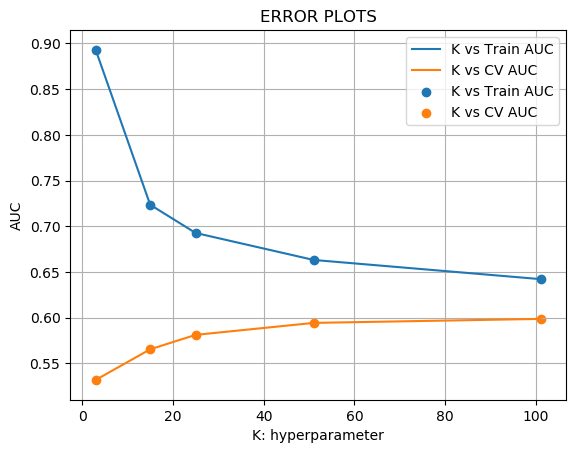

In [286]:
K = [3, 15, 25, 51, 101]

train_auc = []
cv_auc = []

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr_tfidf,y_train)
    
    y_train_pred = batch_predict(neigh,X_tr_tfidf)
    y_cv_pred = batch_predict(neigh,X_cr_tfidf)

## Calculate AUC 
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs 
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

## we will plot the auc scores corresponding to different K's to get our best K
plt.style.use('default')

plt.plot(K,train_auc,label = "K vs Train AUC")
plt.plot(K,cv_auc,label = "K vs CV AUC")

plt.scatter(K,train_auc,label = "K vs Train AUC")
plt.scatter(K,cv_auc,label = "K vs CV AUC")

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 2.4.2.3 Applying KNN

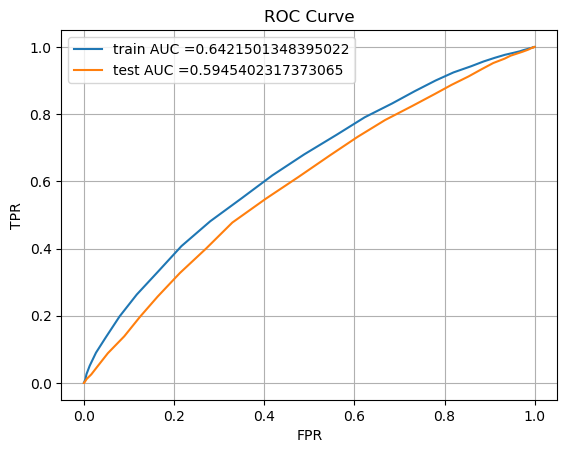

In [287]:
best_k = 101

## Plotting ROC Curve for both train and test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1)
neigh.fit(X_tr_tfidf,y_train)

y_train_pred = batch_predict(neigh, X_tr_tfidf)    
y_test_pred = batch_predict(neigh, X_te_tfidf)

train_fpr_tfidf, train_tpr_tfidf, tr_the_tfidf = roc_curve(y_train, y_train_pred)
test_fpr_tfidf, test_tpr_tfidf,te_the_tfidf = roc_curve(y_test,y_test_pred)

plt.style.use('default')
plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [288]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [289]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_the_tfidf, train_fpr_tfidf, train_tpr_tfidf)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.35946253085076163 for threshold 0.842
Train confusion matrix
[[ 2092  1503]
 [ 7206 11644]]
Test confusion matrix
[[1383 1259]
 [5357 8501]]


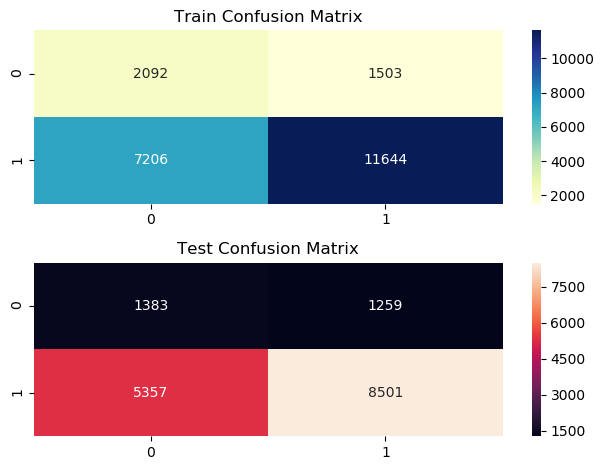

In [290]:
#cite:
# http://seaborn.pydata.org/generated/seaborn.heatmap.html -- Heat maps
# https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib -- tight layout for spacing

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set_title('Train Confusion Matrix')
ax2.set_title('Test Confusion Matrix')
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True ,fmt = 'd', ax = ax1,cmap="YlGnBu")
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True ,fmt = 'd', ax= ax2)# #annot=True to annotate cells
fig.tight_layout()

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

#### 2.4.3.1 Concatnating

In [291]:
X_tr = hstack((X_train_cat_ohe, X_train_subcat_ohe, X_train_essay_avg_w2v, X_train_title_avg_w2v, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std, X_train_teach_prev_std)).tocsr()
X_te = hstack((X_test_cat_ohe, X_test_subcat_ohe, X_test_essay_avg_w2v, X_test_title_avg_w2v, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std, X_test_teach_prev_std)).tocsr()
X_cr = hstack((X_cv_cat_ohe, X_cv_subcat_ohe, X_cv_essay_avg_w2v, X_cv_title_avg_w2v, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std, X_cv_teach_prev_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 702) (22445,)
(11055, 702) (11055,)
(16500, 702) (16500,)


#### 2.4.3.2 Searching for best K

100%|██████████| 5/5 [29:32<00:00, 354.22s/it]


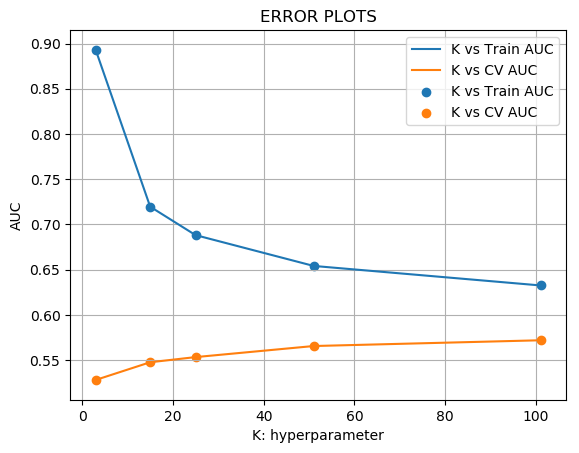

In [292]:
K = [3, 15, 25, 51, 101]

train_auc = []
cv_auc = []

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr,y_train)
    
    y_train_pred = batch_predict(neigh,X_tr)
    y_cv_pred = batch_predict(neigh,X_cr)

## Calculate AUC 
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs 
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

## we will plot the auc scores corresponding to different K's to get our best K
plt.style.use('default')
plt.plot(K,train_auc,label = "K vs Train AUC")
plt.plot(K,cv_auc,label = "K vs CV AUC")

plt.scatter(K,train_auc,label = "K vs Train AUC")
plt.scatter(K,cv_auc,label = "K vs CV AUC")

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 2.4.3.3 Applying KNN

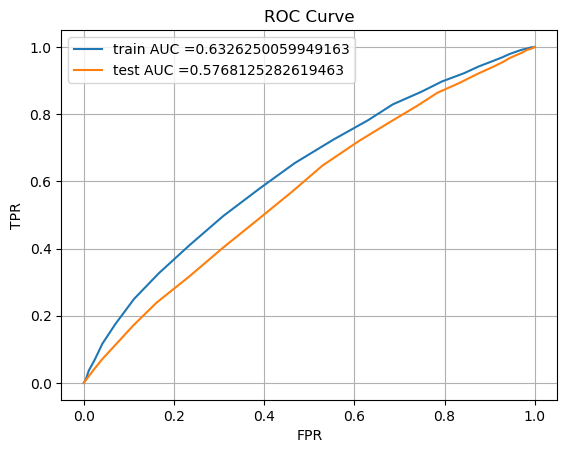

In [293]:
best_k = 101

## Plotting ROC Curve for both train and test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1)
neigh.fit(X_tr,y_train)

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr_aw2v, train_tpr_aw2v, tr_the_aw2v = roc_curve(y_train, y_train_pred)
test_fpr_aw2v, test_tpr_aw2v, te_the_aw2v = roc_curve(y_test,y_test_pred)

plt.style.use('default')
plt.plot(train_fpr_aw2v, train_tpr_aw2v, label="train AUC ="+str(auc(train_fpr_aw2v, train_tpr_aw2v)))
plt.plot(test_fpr_aw2v, test_tpr_aw2v, label="test AUC ="+str(auc(test_fpr_aw2v, test_tpr_aw2v)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [294]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba: 
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [295]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_the_aw2v, train_fpr_aw2v, train_tpr_aw2v)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3530658186473255 for threshold 0.851
Train confusion matrix
[[ 2189  1406]
 [ 7920 10930]]
Test confusion matrix
[[1419 1223]
 [5954 7904]]


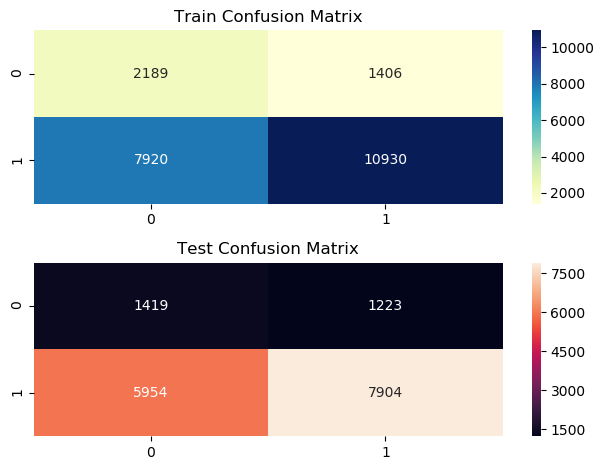

In [296]:
# cite:
# http://seaborn.pydata.org/generated/seaborn.heatmap.html -- Heat maps
# https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib -- tight layout for spacing

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set_title('Train Confusion Matrix')
ax2.set_title('Test Confusion Matrix')
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True ,fmt = 'd', ax = ax1,cmap="YlGnBu")
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True ,fmt = 'd', ax= ax2)# #annot=True to annotate cells
fig.tight_layout()

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

#### 2.4.4.1 Concatnating

In [297]:
X_tr_c = hstack((X_train_cat_ohe, X_train_subcat_ohe, X_train_essay_tfidf_w2v, X_train_title_tfidf_w2v, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std, X_train_teach_prev_std)).tocsr()
X_te_c = hstack((X_test_cat_ohe, X_test_subcat_ohe, X_test_essay_tfidf_w2v, X_test_title_tfidf_w2v, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std, X_test_teach_prev_std)).tocsr()
X_cr_c = hstack((X_cv_cat_ohe, X_cv_subcat_ohe, X_cv_essay_tfidf_w2v, X_cv_title_tfidf_w2v, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std, X_cv_teach_prev_std)).tocsr()

print("Final Data matrix")
print(X_tr_c.shape, y_train.shape)
print(X_cr_c.shape, y_cv.shape)
print(X_te_c.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 702) (22445,)
(11055, 702) (11055,)
(16500, 702) (16500,)


#### 2.4.4.2 Searching for Best K

100%|██████████| 5/5 [31:26<00:00, 378.60s/it]


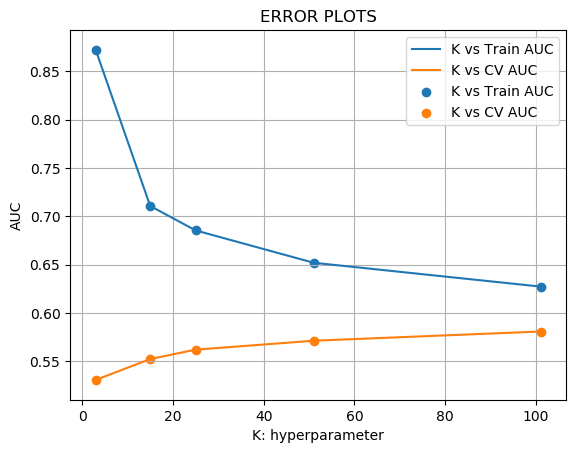

In [298]:
K = [3, 15, 25, 51, 101]

train_auc = []
cv_auc = []

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr,y_train)
    
    y_train_pred = batch_predict(neigh,X_tr_c)
    y_cv_pred = batch_predict(neigh,X_cr_c)

## Calculate AUC 
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs 
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

## we will plot the auc scores corresponding to different K's to get our best K
plt.style.use('default')
plt.plot(K,train_auc,label = "K vs Train AUC")
plt.plot(K,cv_auc,label = "K vs CV AUC")
 
plt.scatter(K,train_auc,label = "K vs Train AUC")
plt.scatter(K,cv_auc,label = "K vs CV AUC")

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 2.4.4.3 Applying KNN

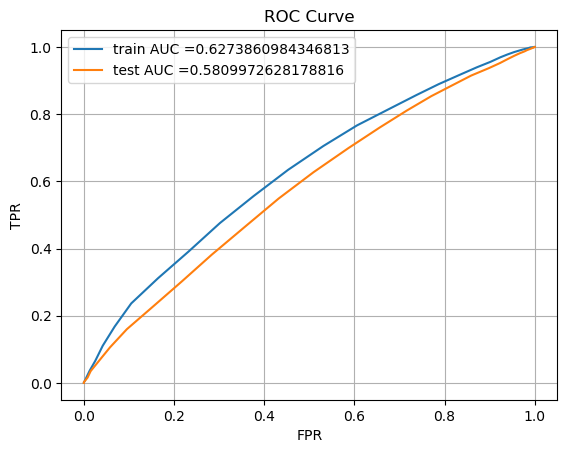

In [299]:
best_k = 101

## Plotting ROC Curve for both train and test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1)
neigh.fit(X_tr,y_train)

y_train_pred = batch_predict(neigh, X_tr_c)    
y_test_pred = batch_predict(neigh, X_te_c)

train_fpr_tfw2v, train_tpr_tfw2v, tr_the_tfw2v = roc_curve(y_train, y_train_pred)
test_fpr_tfw2v, test_tpr_tfw2v,te_the_tfw2v = roc_curve(y_test,y_test_pred)

plt.style.use('default')
plt.plot(train_fpr_tfw2v, train_tpr_tfw2v, label="train AUC ="+str(auc(train_fpr_tfw2v, train_tpr_tfw2v)))
plt.plot(test_fpr_tfw2v, test_tpr_tfw2v, label="test AUC ="+str(auc(test_fpr_tfw2v, test_tpr_tfw2v)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [300]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_the_tfw2v, train_fpr_tfw2v, train_tpr_tfw2v)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3468639541361233 for threshold 0.842
Train confusion matrix
[[ 1966  1629]
 [ 6894 11956]]
Test confusion matrix
[[1296 1346]
 [5167 8691]]


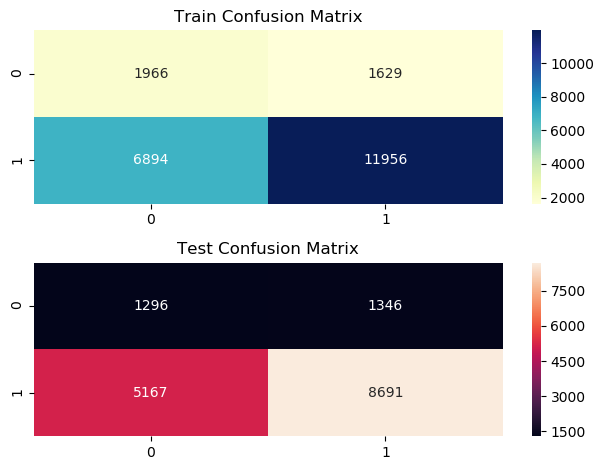

In [301]:
# cite:
# http://seaborn.pydata.org/generated/seaborn.heatmap.html -- Heat maps
# https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib -- tight layout for spacing

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set_title('Train Confusion Matrix')
ax2.set_title('Test Confusion Matrix')
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True ,fmt = 'd', ax = ax1,cmap="YlGnBu")
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True ,fmt = 'd', ax= ax2)# #annot=True to annotate cells
fig.tight_layout()

<h2>2.5 Feature selection with `SelectKBest` </h2>

#### 2.5.1 Selecting "K" Best features for Tf-Idf Model

In [302]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from sklearn.feature_selection import SelectKBest, chi2, f_classif

K_best = SelectKBest(f_classif, k=2000).fit(X_tr_tfidf, y_train)
X_new_tr = K_best.transform(X_tr_tfidf)
X_new_cr = K_best.transform(X_cr_tfidf)
X_new_te = K_best.transform(X_te_tfidf)
X_new_tr.shape

(22445, 2000)

#### 2.5.2 Searching for best K for Knn

100%|██████████| 5/5 [04:40<00:00, 56.19s/it]


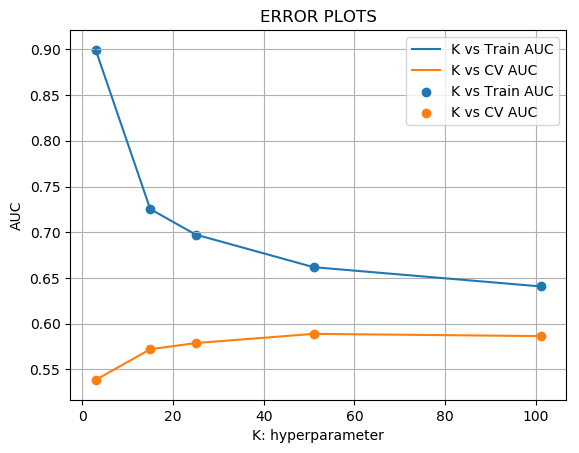

In [303]:
K = [3, 15, 25, 51, 101]

train_auc = []
cv_auc = []

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_new_tr,y_train)
    
    y_train_pred = batch_predict(neigh,X_new_tr)
    y_cv_pred = batch_predict(neigh,X_new_cr)

## Calculate AUC 
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs 
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

## we will plot the auc scores corresponding to different K's to get our best K

plt.style.use('default')
plt.plot(K,train_auc,label = "K vs Train AUC")
plt.plot(K,cv_auc,label = "K vs CV AUC")

plt.scatter(K,train_auc,label = "K vs Train AUC")
plt.scatter(K,cv_auc,label = "K vs CV AUC")

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 2.5.3 Applying KNN on "K" Best features with best K neighbors

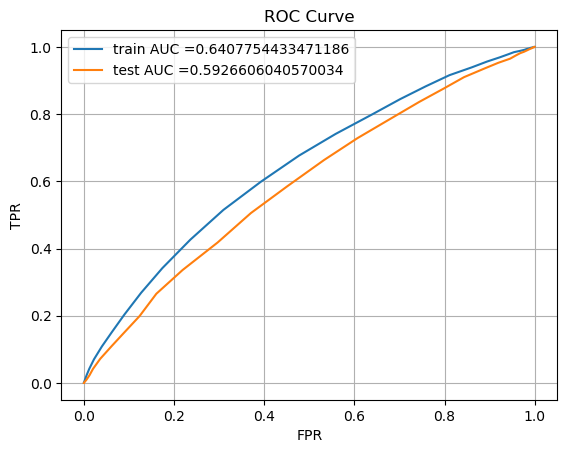

In [304]:
best_k = 101

## Plotting ROC Curve for both train and test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1)
neigh.fit(X_new_tr,y_train)

y_train_pred = batch_predict(neigh, X_new_tr)    
y_test_pred = batch_predict(neigh, X_new_te)

train_fpr_kb, train_tpr_kb, tr_the_kb = roc_curve(y_train, y_train_pred)
test_fpr_kb, test_tpr_kb,te_the_kb = roc_curve(y_test,y_test_pred)

plt.style.use('default')
plt.plot(train_fpr_kb, train_tpr_kb, label="train AUC ="+str(auc(train_fpr_kb, train_tpr_kb)))
plt.plot(test_fpr_kb, test_tpr_kb, label="test AUC ="+str(auc(test_fpr_kb, test_tpr_kb)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [305]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_the_kb, train_fpr_kb, train_tpr_kb)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.36366286804174675 for threshold 0.842
Train confusion matrix
[[ 2183  1412]
 [ 7561 11289]]
Test confusion matrix
[[1450 1192]
 [5748 8110]]


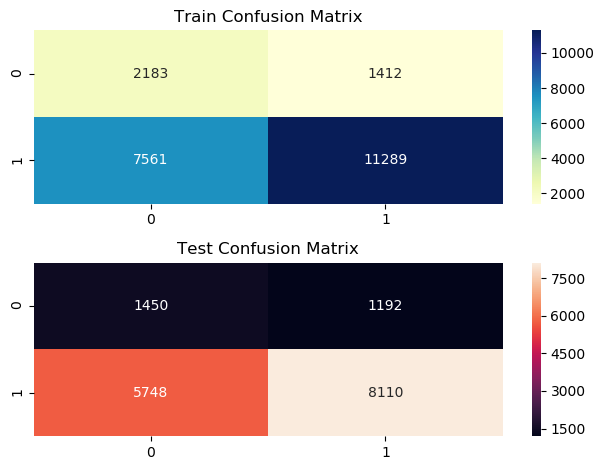

In [306]:
# cite:
# http://seaborn.pydata.org/generated/seaborn.heatmap.html -- Heat maps
# https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib -- tight layout for spacing

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set_title('Train Confusion Matrix')
ax2.set_title('Test Confusion Matrix')
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True ,fmt = 'd', ax = ax1,cmap="YlGnBu")
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True ,fmt = 'd', ax= ax2)# #annot=True to annotate cells
fig.tight_layout()

<h1>3. Conclusions</h1>

In [307]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

In [308]:
pt = PrettyTable(["Model", "Train AUC", "Test AUC","K"])
pt.add_row(["Bag Of Words", auc(train_fpr_bow, train_tpr_bow), auc(test_fpr_aw2v, test_tpr_aw2v), 101])
pt.add_row(["Tf-Idf", auc(train_fpr_tfidf, train_tpr_tfidf), auc(test_fpr_tfidf, test_tpr_tfidf), 101])
pt.add_row(["Avg W2V", auc(train_fpr_aw2v, train_tpr_aw2v), auc(test_fpr_aw2v, test_tpr_aw2v), 101 ])
pt.add_row(["Tf Idf W2V", auc(train_fpr_tfw2v, train_tpr_tfw2v), auc(test_fpr_tfw2v, test_tpr_tfw2v), 101 ])
pt.add_row(["Tf Idf K Best", auc(train_fpr_kb, train_tpr_kb), auc(test_fpr_kb, test_tpr_kb), 101 ])

print(pt)

+---------------+--------------------+--------------------+-----+
|     Model     |     Train AUC      |      Test AUC      |  K  |
+---------------+--------------------+--------------------+-----+
|  Bag Of Words | 0.6563765028794044 | 0.5768125282619463 | 101 |
|     Tf-Idf    | 0.6421501348395022 | 0.5945402317373065 | 101 |
|    Avg W2V    | 0.6326250059949163 | 0.5768125282619463 | 101 |
|   Tf Idf W2V  | 0.6273860984346813 | 0.5809972628178816 | 101 |
| Tf Idf K Best | 0.6407754433471186 | 0.5926606040570034 | 101 |
+---------------+--------------------+--------------------+-----+



1. We can see that Bag Of Words "Train AUC" is highest but the test AUC is same as the Avg W2V.
2. We can see the best Test AUC is of Tf-Idf model and the train AUC is not highest but greater than the Avg W2V, Tf Idf W2V, Tf Idf K Best.
3. Train AUC and Test AUC of Tf Idf K Best model are almost same as Tf Idf model.

#### Train and Test AUC are not very far from each other for each case but are low, we might need some more parameter tuning here and also it would be more benificial to tune the parameters of Tf-Idf model and Tf-Idf K Best model as it has the highest test AUC.